<a href="https://colab.research.google.com/github/HadyG1337/BMIS331-FinanceProject/blob/main/Real_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance
!pip install matplotlib
!pip install seaborn
!pip install datetime
!pip install requests
!pip install beautifulsoup4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 948.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 3.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import yfinance as yf
import os
import matplotlib.pyplot as plt
import seaborn
from datetime import datetime, timedelta
import requests
import pprint
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
def get_biggest_rise_today(stocks):
    biggest_rise = 0
    best_stock = None

    for stock_symbol in stocks:
        stock = yf.Ticker(stock_symbol)
        hist = stock.history(period="1d")
        if len(hist) > 0:
            today_open = hist.iloc[0]['Open']
            today_close = hist.iloc[-1]['Close']
            percent_change = ((today_close - today_open) / today_open) * 100
            if percent_change > biggest_rise:
                biggest_rise = percent_change
                best_stock = stock_symbol

    return best_stock, biggest_rise

if __name__ == "__main__":
    # Example list of stock symbols
    stock_symbols = ["AAPL", "ABBV", "ABT", "ACN", "ADBE", "AMGN", "AMZN", "ASML","AZN", "BA", "BABA", "BAC", "BDX", "BIIB", "BKNG", "BMY", "BNTX", "BP", "BRK-A", "BRK-B", "C", "CAT", "CHTR", "CL", "CMCSA", "COF", "COP", "COST", "CRM", "CSCO", "CVX", "DDOG", "DHR", "DIS", "DHR", "DLTR", "DUK", "ENPH","FDX","GE", "GILD", "GOOGL", "GOOG", "HD", "HON", "HON", "HWM", "IBM", "INTC", "ISRG", "JNJ", "JPM", "KO", "LLY", "LMT", "LOW", "MA", "MCD", "MDT", "MMM", "MO", "MRK", "MSFT", "MU", "NFLX", "NKE", "NVO", "NVS", "NVDA", "ORCL", "PDD", "PEP", "PFE", "PG", "PM", "PYPL", "QCOM", "RTX", "SAP", "SHOP", "SLB", "SNOW", "SNY", "SO", "T", "TMO", "TMUS", "TSLA", "TXN", "UNH", "UNP", "UPS", "V", "VZ", "WBA", "WFC", "WMT", "XOM", "ZM"]

    best_stock, biggest_rise = get_biggest_rise_today(stock_symbols)
    print(f"The stock with the biggest rise today is {best_stock} with a rise of {biggest_rise:.2f}%")

The stock with the biggest rise today is ENPH with a rise of 3.25%


In [5]:
def get_top_risers_today(stocks):
    risers = []

    for stock_symbol in stocks:
        stock = yf.Ticker(stock_symbol)
        hist = stock.history(period="1d")
        if len(hist) > 0:
            today_open = hist.iloc[0]['Open']
            today_close = hist.iloc[-1]['Close']

            # Avoid division by zero
            if today_open != 0:
                percent_change = ((today_close - today_open) / today_open) * 100
                risers.append((stock_symbol, percent_change))

    # Sort the risers based on percent change
    risers.sort(key=lambda x: x[1], reverse=True)

    return risers[:5]

if __name__ == "__main__":
    stock_symbols = ["AAPL", "ABBV", "ABT", "ACN", "ADBE", "AMGN", "AMZN", "ASML","AZN", "BA", "BABA", "BAC", "BDX", "BIIB", "BKNG", "BMY", "BNTX", "BP", "BRK-A", "BRK-B", "C", "CAT", "CHTR", "CL", "CMCSA", "COF", "COP", "COST", "CRM", "CSCO", "CVX", "DDOG", "DHR", "DIS", "DHR", "DLTR", "DUK", "ENPH","FDX","GE", "GILD", "GOOGL", "GOOG", "HD", "HON", "HON", "HWM", "IBM", "INTC", "ISRG", "JNJ", "JPM", "KO", "LLY", "LMT", "LOW", "MA", "MCD", "MDT", "MMM", "MO", "MRK", "MSFT", "MU", "NFLX", "NKE", "NVO", "NVS", "NVDA", "ORCL", "PDD", "PEP", "PFE", "PG", "PM", "PYPL", "QCOM", "RTX", "SAP", "SHOP", "SLB", "SNOW", "SNY", "SO", "T", "TMO", "TMUS", "TSLA", "TXN", "UNH", "UNP", "UPS", "V", "VZ", "WBA", "WFC", "WMT", "XOM", "ZM"]

    top_risers = get_top_risers_today(stock_symbols)
    if top_risers:
        print("Top 5 risers today:")
        for i, (stock, rise) in enumerate(top_risers):
            print(f"{i+1}. {stock}: {rise:.2f}%")
    else:
        print("No data available for today.")

Top 5 risers today:
1. ENPH: 3.25%
2. NFLX: 2.44%
3. PDD: 2.04%
4. DIS: 2.00%
5. ABBV: 1.63%


In [ ]:
def get_top_yearly_risers(stocks):
    risers = []

    # Get today's date
    today = datetime.today().strftime('%Y-%m-%d')

    for stock_symbol in stocks:
        stock = yf.Ticker(stock_symbol)
        hist = stock.history(start="2024-01-01", end=today)
        if len(hist) > 0:
            first_open = hist.iloc[0]['Open']
            last_close = hist.iloc[-1]['Close']

            # Avoid division by zero
            if first_open != 0:
                percent_change = ((last_close - first_open) / first_open) * 100
                risers.append((stock_symbol, percent_change))

    # Sort the risers based on percent change
    risers.sort(key=lambda x: x[1], reverse=True)

    return risers[:5]

if __name__ == "__main__":
    stock_symbols = ["AAPL", "ABBV", "ABT", "ACN", "ADBE", "AMGN", "AMZN", "ASML","AZN", "BA", "BABA", "BAC", "BDX", "BIIB", "BKNG", "BMY", "BNTX", "BP", "BRK-A", "BRK-B", "C", "CAT", "CHTR", "CL", "CMCSA", "COF", "COP", "COST", "CRM", "CSCO", "CVX", "DDOG", "DHR", "DIS", "DHR", "DLTR", "DUK", "ENPH","FDX","GE", "GILD", "GOOGL", "GOOG", "HD", "HON", "HON", "HWM", "IBM", "INTC", "ISRG", "JNJ", "JPM", "KO", "LLY", "LMT", "LOW", "MA", "MCD", "MDT", "MMM", "MO", "MRK", "MSFT", "MU", "NFLX", "NKE", "NVO", "NVS", "NVDA", "ORCL", "PDD", "PEP", "PFE", "PG", "PM", "PYPL", "QCOM", "RTX", "SAP", "SHOP", "SLB", "SNOW", "SNY", "SO", "T", "TMO", "TMUS", "TSLA", "TXN", "UNH", "UNP", "UPS", "V", "VZ", "WBA", "WFC", "WMT", "XOM", "ZM"]

    top_risers = get_top_yearly_risers(stock_symbols)
    if top_risers:
        print("Top 5 yearly risers:")
        for i, (stock, rise) in enumerate(top_risers):
            print(f"{i+1}. {stock}: {rise:.2f}%")
    else:
        print("No data available for the year.")

Top 5 yearly risers:
1. NVDA: 78.17%
2. GE: 60.45%
3. MU: 36.85%
4. LLY: 26.60%
5. ASML: 26.37%


In [ ]:
def get_top_5years_risers(stocks):
    risers = []

    # Get today's date
    today = datetime.today().strftime('%Y-%m-%d')

    for stock_symbol in stocks:
        stock = yf.Ticker(stock_symbol)
        hist = stock.history(start="2020-03-01", end=today)
        if len(hist) > 0:
            first_open = hist.iloc[0]['Open']
            last_close = hist.iloc[-1]['Close']

            # Avoid division by zero
            if first_open != 0:
                percent_change = ((last_close - first_open) / first_open) * 100
                risers.append((stock_symbol, percent_change))

    # Sort the risers based on percent change
    risers.sort(key=lambda x: x[1], reverse=True)

    return risers[:5]

if __name__ == "__main__":
    stock_symbols = ["AAPL", "ABBV", "ABT", "ACN", "ADBE", "AMGN", "AMZN", "ASML","AZN", "BA", "BABA", "BAC", "BDX", "BIIB", "BKNG", "BMY", "BNTX", "BP", "BRK-A", "BRK-B", "C", "CAT", "CHTR", "CL", "CMCSA", "COF", "COP", "COST", "CRM", "CSCO", "CVX", "DDOG", "DHR", "DIS", "DHR", "DLTR", "DUK", "ENPH","FDX","GE", "GILD", "GOOGL", "GOOG", "HD", "HON", "HON", "HWM", "IBM", "INTC", "ISRG", "JNJ", "JPM", "KO", "LLY", "LMT", "LOW", "MA", "MCD", "MDT", "MMM", "MO", "MRK", "MSFT", "MU", "NFLX", "NKE", "NVO", "NVS", "NVDA", "ORCL", "PDD", "PEP", "PFE", "PG", "PM", "PYPL", "QCOM", "RTX", "SAP", "SHOP", "SLB", "SNOW", "SNY", "SO", "T", "TMO", "TMUS", "TSLA", "TXN", "UNH", "UNP", "UPS", "V", "VZ", "WBA", "WFC", "WMT", "XOM", "ZM"]

    top_risers = get_top_5years_risers(stock_symbols)
    if top_risers:
        print("Top 5 risers since the pandemic:")
        for i, (stock, rise) in enumerate(top_risers):
            print(f"{i+1}. {stock}: {rise:.2f}%")
    else:
        print("No data available for the year.")

Top 5 risers since the pandemic:
1. NVDA: 1171.64%
2. LLY: 506.61%
3. NVO: 349.18%
4. TSLA: 254.91%
5. PDD: 249.49%


In [ ]:
def get_top_yearly_risers_by_dollar(stocks):
    risers = []

    # Get today's date
    today = datetime.today().strftime('%Y-%m-%d')

    for stock_symbol in stocks:
        stock = yf.Ticker(stock_symbol)
        hist = stock.history(start="2024-01-01", end=today)
        if len(hist) > 0:
            first_close = hist.iloc[0]['Close']
            last_close = hist.iloc[-1]['Close']

            # Calculate dollar rise
            dollar_rise = last_close - first_close
            risers.append((stock_symbol, dollar_rise))

    # Sort the risers based on dollar rise
    risers.sort(key=lambda x: x[1], reverse=True)

    return risers[:5]

if __name__ == "__main__":
    stock_symbols = ["AAPL", "ABBV", "ABT", "ACN", "ADBE", "AMGN", "AMZN", "ASML","AZN", "BA", "BABA", "BAC", "BDX", "BIIB", "BKNG", "BMY", "BNTX", "BP", "BRK-A", "BRK-B", "C", "CAT", "CHTR", "CL", "CMCSA", "COF", "COP", "COST", "CRM", "CSCO", "CVX", "DDOG", "DHR", "DIS", "DHR", "DLTR", "DUK", "ENPH","FDX","GE", "GILD", "GOOGL", "GOOG", "HD", "HON", "HON", "HWM", "IBM", "INTC", "ISRG", "JNJ", "JPM", "KO", "LLY", "LMT", "LOW", "MA", "MCD", "MDT", "MMM", "MO", "MRK", "MSFT", "MU", "NFLX", "NKE", "NVO", "NVS", "NVDA", "ORCL", "PDD", "PEP", "PFE", "PG", "PM", "PYPL", "QCOM", "RTX", "SAP", "SHOP", "SLB", "SNOW", "SNY", "SO", "T", "TMO", "TMUS", "TSLA", "TXN", "UNH", "UNP", "UPS", "V", "VZ", "WBA", "WFC", "WMT", "XOM", "ZM"]

    top_risers = get_top_yearly_risers_by_dollar(stock_symbols)
    if top_risers:
        print("Top 5 yearly risers by dollar amount:")
        for i, (stock, rise) in enumerate(top_risers):
            print(f"{i+1}. {stock}: ${rise:.2f}")
    else:
        print("No data available for the year.")

Top 5 yearly risers by dollar amount:
1. BRK-A: $57133.00
2. NVDA: $395.69
3. ASML: $204.81
4. LLY: $142.35
5. NFLX: $92.73


In [ ]:
# Prompting the user to choose a stock
stock = input("Enter a stock ticker: ")

stocks = yf.download(stock, start = "2010-01-01", end = "2024-11-01")
data = stocks.loc[:, "Close"].copy()

Enter a stock ticker: AAPL


[*********************100%%**********************]  1 of 1 completed


/var/folders/t_/pq_4d7xs6rd73x_hz_lbc4540000gn/T/ipykernel_3369/3203114582.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


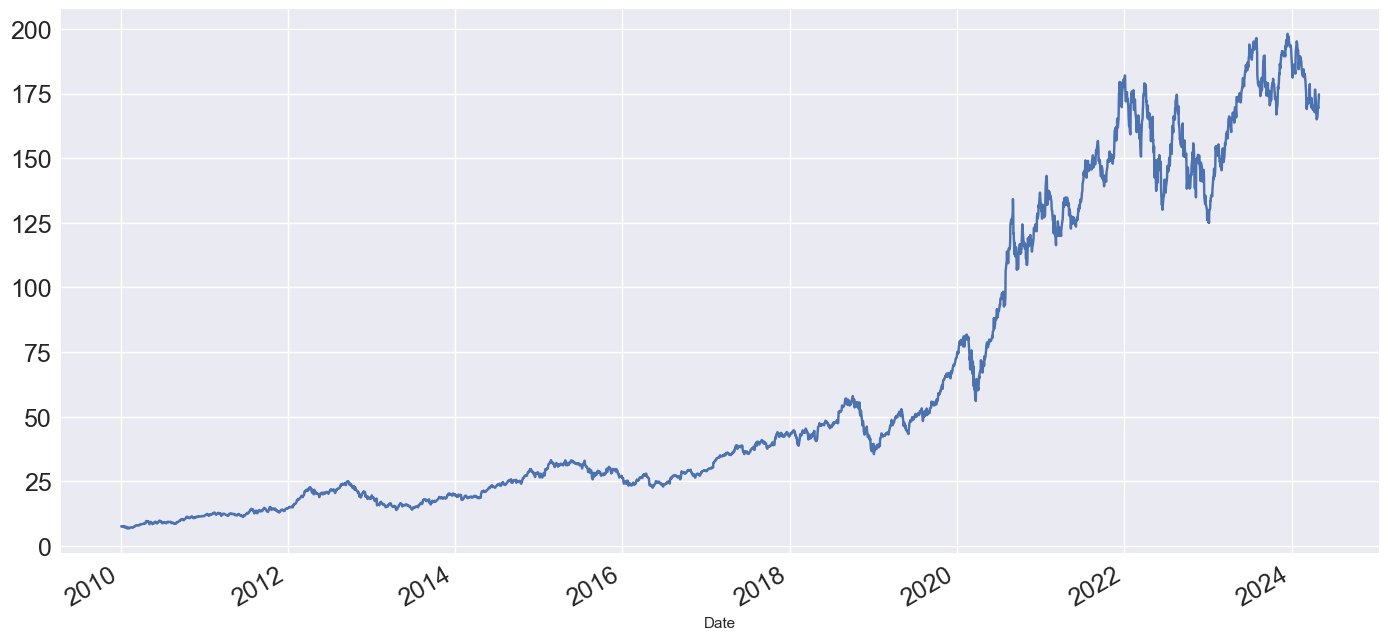

In [ ]:
data.plot(figsize = (17,8), fontsize = 18)
plt.style.use("seaborn")
plt.show()

/var/folders/t_/pq_4d7xs6rd73x_hz_lbc4540000gn/T/ipykernel_3369/2607512555.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


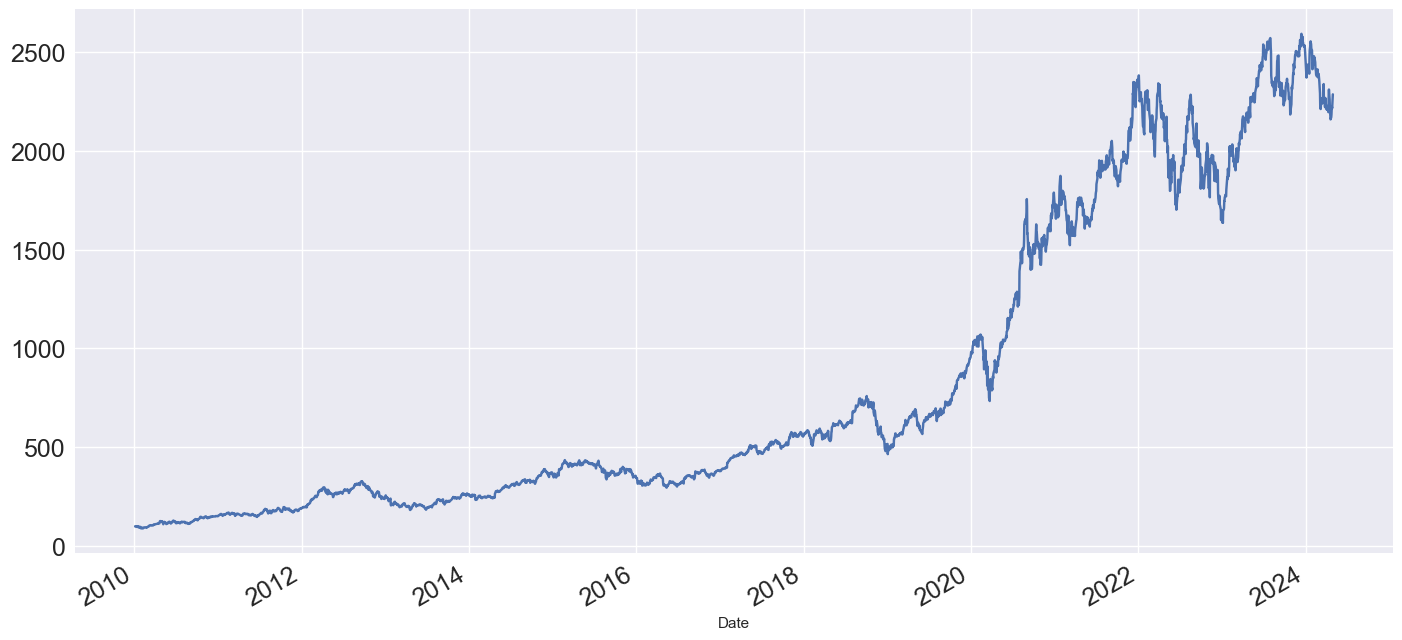

In [ ]:
normData = data.div(data.iloc[0]).mul(100)
normData.plot(figsize = (17,8),fontsize = 18)
plt.style.use("seaborn")
plt.show()

In [ ]:
# Define a list of stock symbols
stock_symbols = ["AAPL", "ABBV", "ABT", "ACN", "ADBE", "AMGN", "AMZN", "ASML","AZN", "BA", "BABA", "BAC", "BDX", "BIIB", "BKNG", "BMY", "BNTX", "BP", "BRK-A", "BRK-B", "C", "CAT", "CHTR", "CL", "CMCSA", "COF", "COP", "COST", "CRM", "CSCO", "CVX", "DDOG", "DHR", "DIS", "DHR", "DLTR", "DUK", "ENPH","FDX","GE", "GILD", "GOOGL", "GOOG", "HD", "HON", "HON", "HWM", "IBM", "INTC", "ISRG", "JNJ", "JPM", "KO", "LLY", "LMT", "LOW", "MA", "MCD", "MDT", "MMM", "MO", "MRK", "MSFT", "MU", "NFLX", "NKE", "NVO", "NVS", "NVDA", "ORCL", "PDD", "PEP", "PFE", "PG", "PM", "PYPL", "QCOM", "RTX", "SAP", "SHOP", "SLB", "SNOW", "SNY", "SO", "T", "TMO", "TMUS", "TSLA", "TXN", "UNH", "UNP", "UPS", "V", "VZ", "WBA", "WFC", "WMT", "XOM", "ZM"]

# Create an empty DataFrame to store the top risers for each stock
top_risers_all = pd.DataFrame()

for stock_symbol in stock_symbols:
    # Download historical data
    data = yf.download(stock_symbol, start="2010-01-01", end=datetime.now())

    # Calculate daily returns
    data['Daily_Returns'] = data['Close'].pct_change()

    # Drop missing values
    data.dropna(inplace=True)

    # Prepare the features and target variable
    X = data[['Open', 'High', 'Low', 'Volume']]  # Features
    y = data['Daily_Returns']  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict daily returns for future dates
    future_data = yf.download(stock_symbol, start=datetime.now(), end="2024-05-08")
    future_X = future_data[['Open', 'High', 'Low', 'Volume']]
    future_predictions = model.predict(future_X)

    # Add predictions to the future data
    future_data['Predicted_Returns'] = future_predictions

    # Sort the data by predicted returns to find top 5 risers for this stock
    top_risers_stock = future_data.sort_values(by='Predicted_Returns', ascending=False).head(1)
    top_risers_stock['Stock'] = stock_symbol  # Add stock ticker symbol
    top_risers_all = pd.concat([top_risers_all, top_risers_stock])

# Sort the combined DataFrame by predicted returns
top_risers_all = top_risers_all.sort_values(by='Predicted_Returns', ascending=False)

# Print the top 5 predicted stock risers for all stocks
print("Top 5 Predicted Stock Risers for All Stocks (Future Dates):")
print(top_risers_all[['Stock', 'Open', 'Close', 'Predicted_Returns']])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Top 5 Predicted Stock Risers for All Stocks (Future Dates):
            Stock         Open        Close  Predicted_Returns
Date                                                          
2024-05-03    LOW   230.130005   232.130005           0.050494
2024-05-03   ENPH   110.599998   114.199997           0.039665
2024-05-03   NFLX   565.549988   579.340027           0.034639
2024-05-03    DIS   111.430000   113.660004           0.028614
2024-05-03   COST   734.280029   743.900024           0.024581
...           ...          ...          ...                ...
2024-05-03   AAPL   186.669998   183.380005          -0.024438
2024-05-03     GE   165.300003   164.110001          -0.027288
2024-05-03  GOOGL   167.559998   167.240005          -0.034825
2024-05-03   BKNG  3700.000000  3577.379883          -0.035945
2024-05-03   GOOG   169.526703   168.990005          -0.036770

[99 rows x 4 columns]


In [ ]:
def get_stock_symbol():
    while True:
        stock_symbol = input("Enter a stock ticker symbol: ").upper()
        if len(stock_symbol) > 0:
            return stock_symbol

# Get user input for stock ticker symbol
stock_symbol = get_stock_symbol()

# Calculate the date for one year from now
future_date = datetime.now() + timedelta(days=365)

# Download historical data
data = yf.download(stock_symbol, start="2010-01-01", end=datetime.now())

# Calculate daily returns
data['Daily_Returns'] = data['Close'].pct_change()

# Drop missing values
data.dropna(inplace=True)

# Prepare the features and target variable
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Daily_Returns']  # Target variable

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict daily returns for future date
future_data = yf.download(stock_symbol,start=datetime.now(), end="2024-05-8" )
future_X = future_data[['Open', 'High', 'Low', 'Volume']]
future_predictions = model.predict(future_X)

# Add predictions to the future data
future_data['Predicted_Returns'] = future_predictions

# Sort the data by predicted returns to find the top riser
top_riser = future_data.sort_values(by='Predicted_Returns', ascending=False).head(1)

# Print the top predicted stock riser
print("Predicted Stock Rise for", stock_symbol)
print(top_riser[['Open', 'Close', 'Predicted_Returns']])

Enter a stock ticker symbol: AAPL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Predicted Stock Rise for AAPL
                  Open       Close  Predicted_Returns
Date                                                 
2024-05-03  186.669998  183.380005          -0.024628
